# Radio Composite Augmentation Demonstration
This work calls on the astroaugmentations package and the classes therein.

In [1]:
import astroaugmentations as AA
from astroaugmentations.datasets.MiraBest_F import MBFRFull

import albumentations as A
from albumentations.pytorch import ToTensorV2

import matplotlib.pyplot as plt
import numpy as np

# Composing a Custom Transformation

In [2]:
train_no_augmentation = MBFRFull(root="./data", train=True, download=True, test_size=0.97)

custom_transform = A.Compose([
    A.Lambda(
        name='Dirty beam convlolution',
        image=AA.radio.CustomKernelConvolution(
            kernel=np.load("./astroaugmentations/example_utilities/FIRST_kernel.npy"), 
            rfi_dropout=0.4, 
            psf_radius=1.3,
            mode='sum'
        ), p=1),
    A.CenterCrop(width=85, height=85, always_apply=True)
])

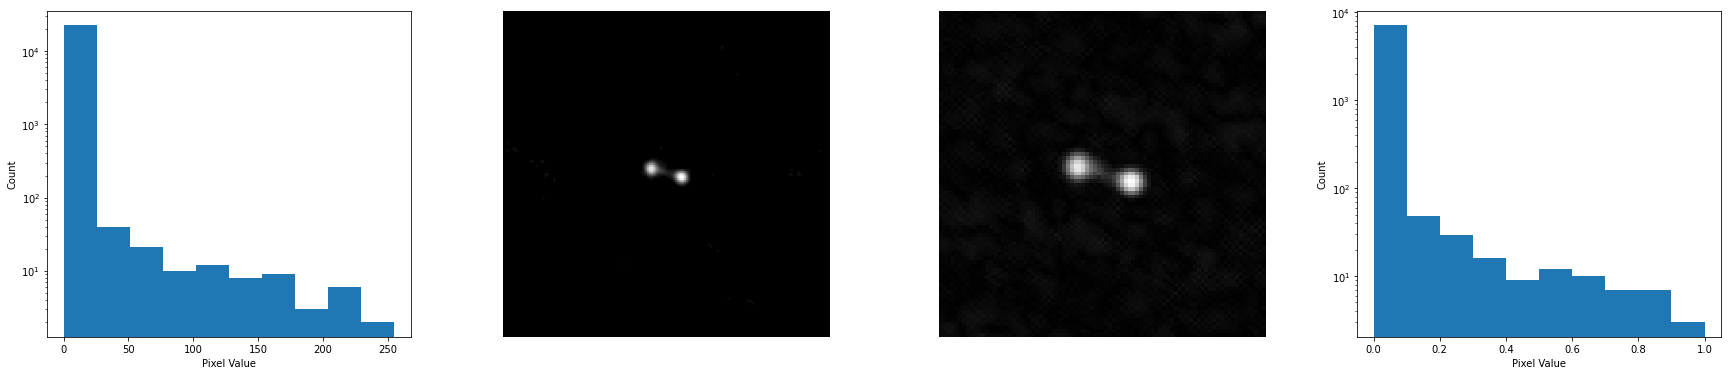

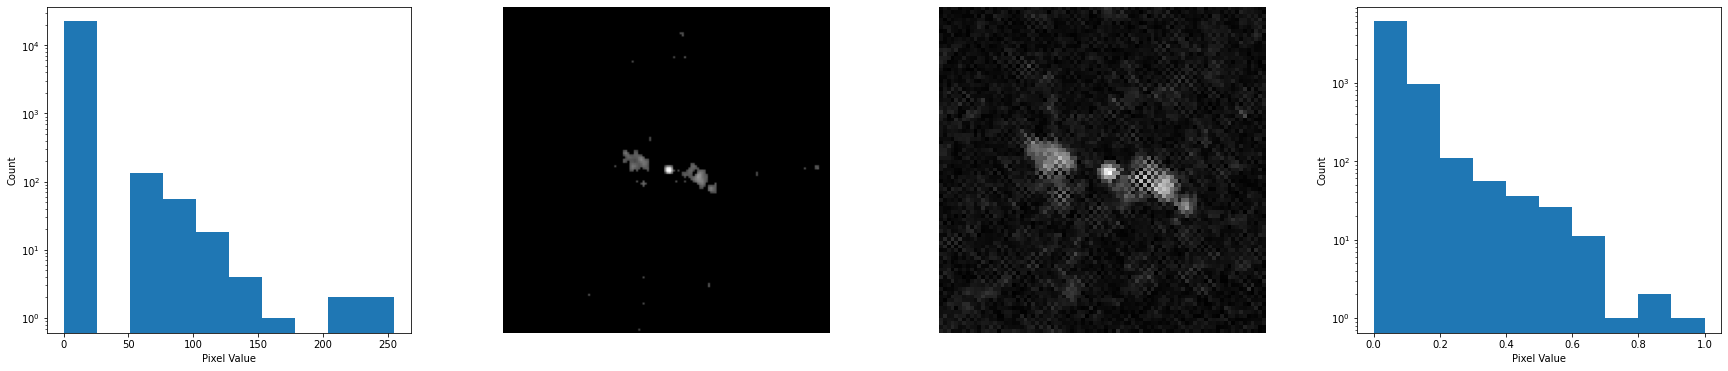

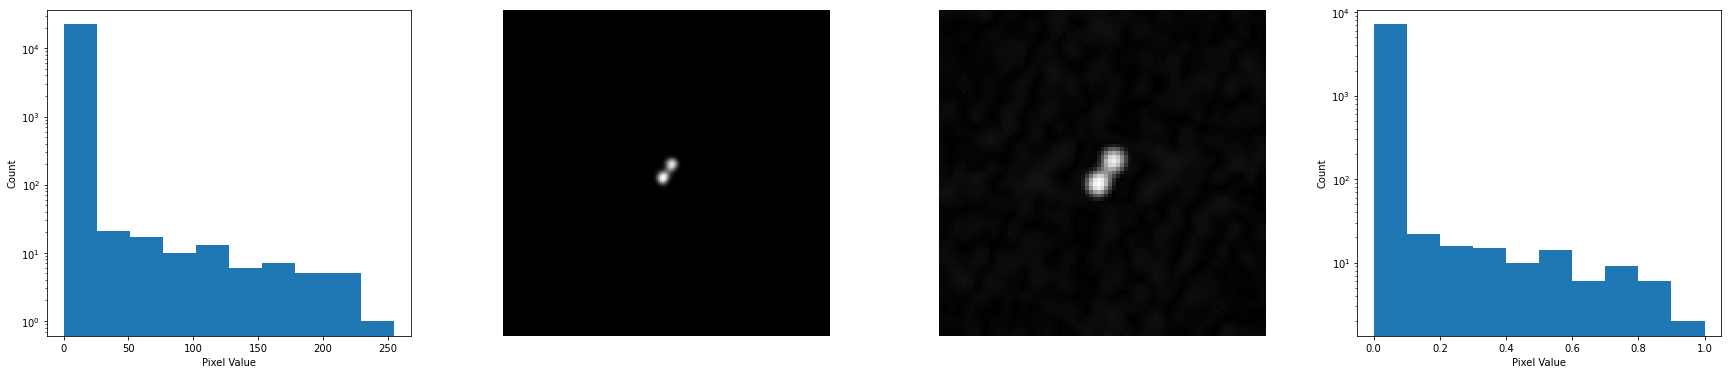

In [3]:
# Plot original image and transoformed image
number_of_examples = 3
transform_no = 1 
for idx, (image, target) in enumerate(train_no_augmentation):
    fig, ax = plt.subplots(1,transform_no+3, figsize=((transform_no+3)*7.5,6))
    image = np.asarray(image)
    ax[0].hist(image.squeeze().flatten())
    ax[0].set_yscale('log')
    ax[0].set_xlabel("Pixel Value")
    ax[0].set_ylabel("Count")
    
    ax[1].imshow(image.squeeze(), cmap="Greys_r")
    ax[1].axis('off')
    
    for i in range(transform_no):
        image = custom_transform(image=image)['image']
        ax[i+2].imshow(image, cmap="Greys_r")
        ax[i+2].axis('off')
    ax[transform_no+2].hist(image.squeeze().flatten())
    ax[transform_no+2].set_yscale('log')
    ax[transform_no+2].set_xlabel("Pixel Value")
    ax[transform_no+2].set_ylabel("Count")
    
    plt.show()
    if idx>=number_of_examples-1:
        break

# Using the Pre-Composed Augmentation Class (Radio)

In [4]:
transform = A.Compose([
    A.Lambda(
        name='AA.composed.ImgRadio',
        image=AA.composed.ImgRadio(
            kernel=np.load("./astroaugmentations/example_utilities/FIRST_kernel.npy"),
        ),
        always_apply=True
    )
])

train = MBFRFull(root="./data", train=True, download=True, test_size=0.97, transform=transform)

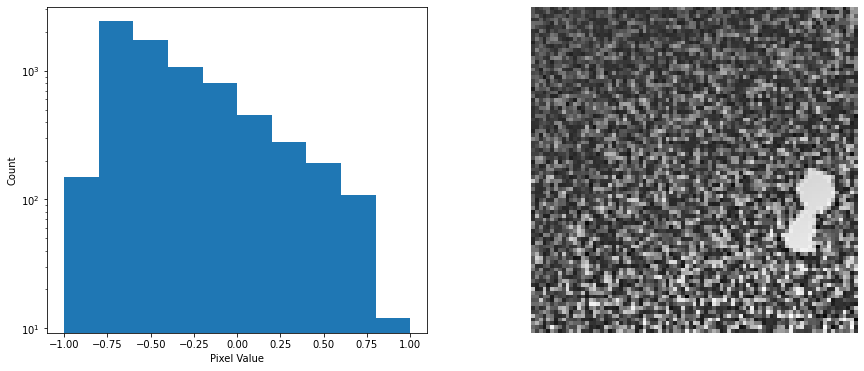

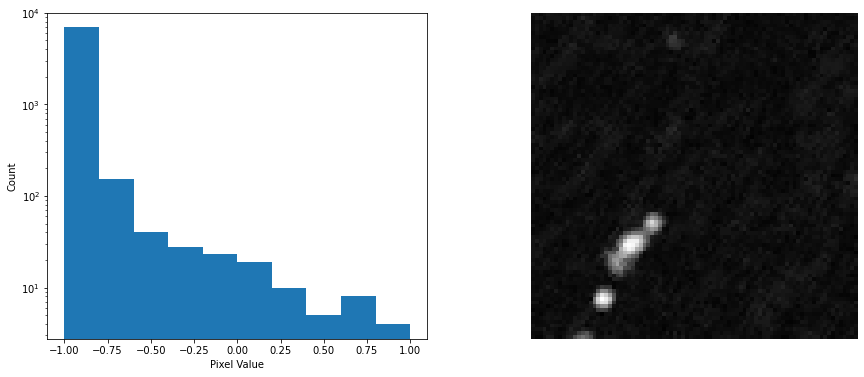

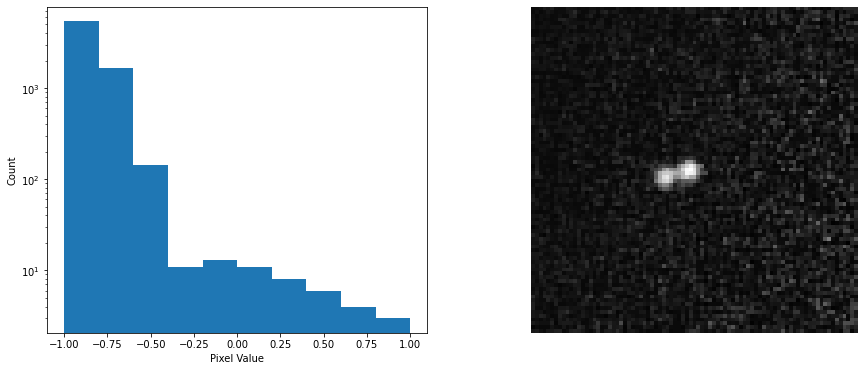

In [5]:
number_of_examples=3
for idx, (image, target) in enumerate(train):
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    
    image = np.asarray(image)
    ax[0].hist(image.squeeze().flatten())
    ax[0].set_yscale('log')
    ax[0].set_xlabel("Pixel Value")
    ax[0].set_ylabel("Count")

    ax[1].imshow(image.squeeze(), cmap="Greys_r")
    ax[1].axis('off')

    plt.show()
    if idx>=number_of_examples-1:
        break